In [1]:
#import matplotlib.pyplot as py
import seaborn as sb
import pandas as pd
import numpy as np    
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('tips.csv')

In [3]:
dataset.shape

(244, 7)

In [4]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
dataset.sample(10)

,total_bill,tip,sex,smoker,day,time,size
212,48.33,9.00,Male,No,Sat,Dinner,4
192,28.44,2.56,Male,Yes,Thur,Lunch,2
59,48.27,6.73,Male,No,Sat,Dinner,4
101,15.38,3.00,Female,Yes,Fri,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
8,15.04,1.96,Male,No,Sun,Dinner,2
158,13.39,2.61,Female,No,Sun,Dinner,2
84,15.98,2.03,Male,No,Thur,Lunch,2
175,32.90,3.11,Male,Yes,Sun,Dinner,2


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [7]:
dataset.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
dataset.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [9]:
#en fazla çalışılan günlerin incelenmesi
df2=dataset.groupby('day').sum() # sum per day
df2.drop('size',inplace=True,axis=1) # sum of size column is not relevant
df2['percent'] = df2['tip']/df2['total_bill']*100 # add percents
print(df2['percent'])

day
Fri     15.944519
Sat     14.642375
Sun     15.203791
Thur    15.673201
Name: percent, dtype: float64


In [10]:
df4= dataset.groupby(['day','size']).sum()
df4['percent'] = df4['tip']/df4['total_bill']*100
df4.dropna() # drop null rows

total_bill     tip    percent
day  size                               
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
Sun  2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774

In [11]:
#kişilerin sigara içme durumuna göre bahşiş yüzdelerinin incelenmesi, sigara içen ve içmeyen grupların yaptığı ödemeler
df3=dataset.groupby('smoker').sum()
df3['percent'] = df3['tip']/df3['total_bill']*100
print(df3)

        total_bill     tip  size    percent
smoker                                     
No         2897.43  451.77   403  15.592094
Yes        1930.34  279.81   224  14.495374


In [12]:
#Gün ve zamanı gruplayarak fatura ve bahşişlerin incelenmesi
df4= dataset.groupby(['day','time']).sum()
df4['percent'] = df4['tip']/df4['total_bill']*100
df4.dropna() # drop null rows

total_bill     tip  size    percent
day  time                                       
Fri  Dinner      235.96   35.28    26  14.951687
     Lunch        89.92   16.68    14  18.549822
Sat  Dinner     1778.40  260.40   219  14.642375
Sun  Dinner     1627.16  247.39   216  15.203791
Thur Dinner       18.78    3.00     2  15.974441
     Lunch      1077.55  168.83   150  15.667950

In [13]:
# kadın erkek oranlarının incelenmesi
df4= dataset.groupby(['sex']).sum()
df4['percent'] = df4['tip']/df4['total_bill']*100
df4.dropna() # drop null rows

,total_bill,tip,size,percent
sex,,,,
Female,1570.95,246.51,214,15.691779
Male,3256.82,485.07,413,14.893976


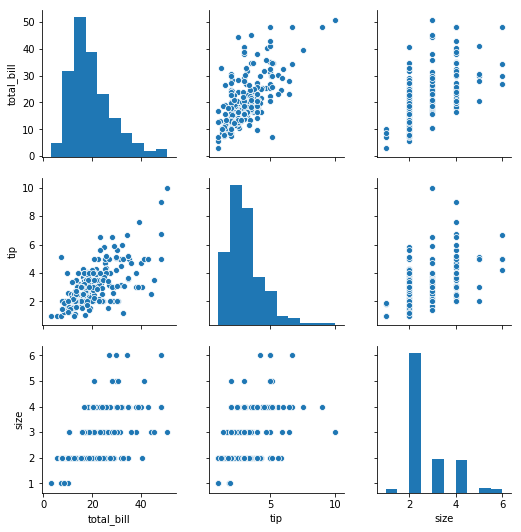

In [14]:
#Çift grafiği iki temel şekil üzerine kuruludur: histogram ve dağılım grafiği. 
#Diyagonal üzerindeki histogram, tek bir değişkenin dağılımını görmemize izin verirken, 
#üst ve alt üçgenlerdeki dağılım grafikleri, iki değişken arasındaki ilişkiyi (veya eksikliğini) gösterir.
sb.pairplot(dataset)

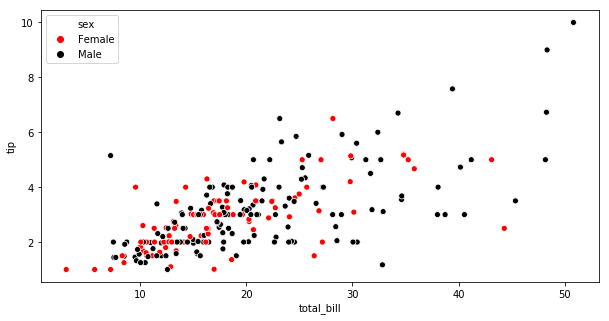

In [15]:
hue_colors={"Male":"black","Female":"red"}
plt.figure(figsize=(10,5))
sb.scatterplot(x="total_bill",
                y="tip",
                data=dataset,
                hue="sex",
                palette=hue_colors)
plt.show()

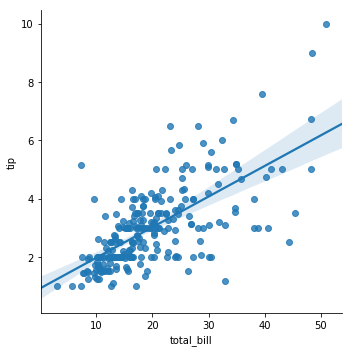

In [17]:
sb.lmplot(x='total_bill',y='tip',data=dataset)

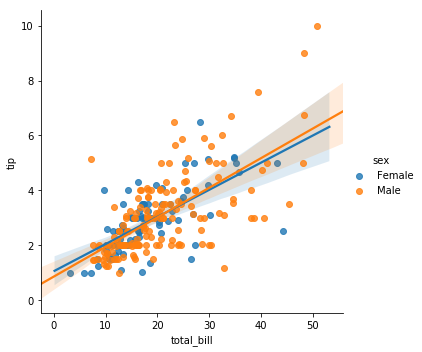

In [18]:
sb.lmplot(x='total_bill',y='tip',data=dataset,hue='sex')

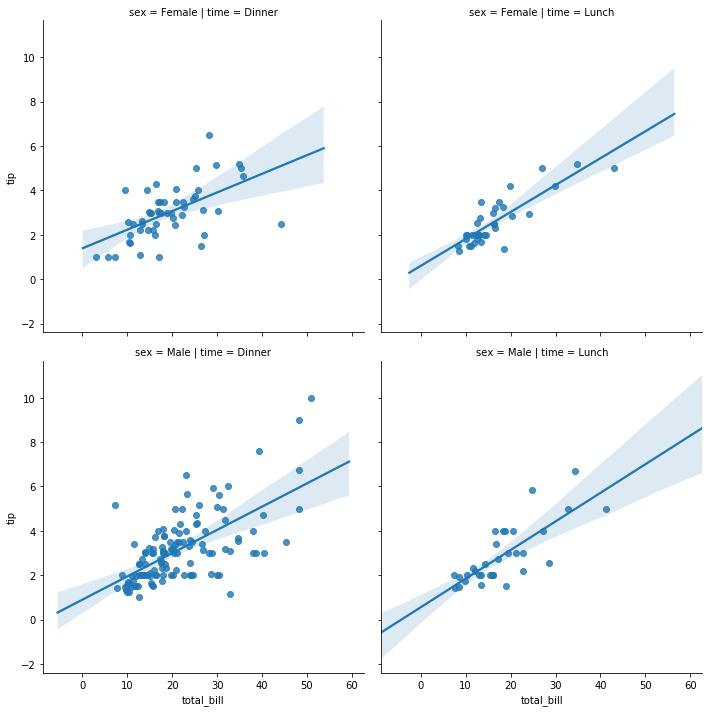

In [19]:
sb.lmplot(x="total_bill", y="tip", row="sex", col="time",data=dataset)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


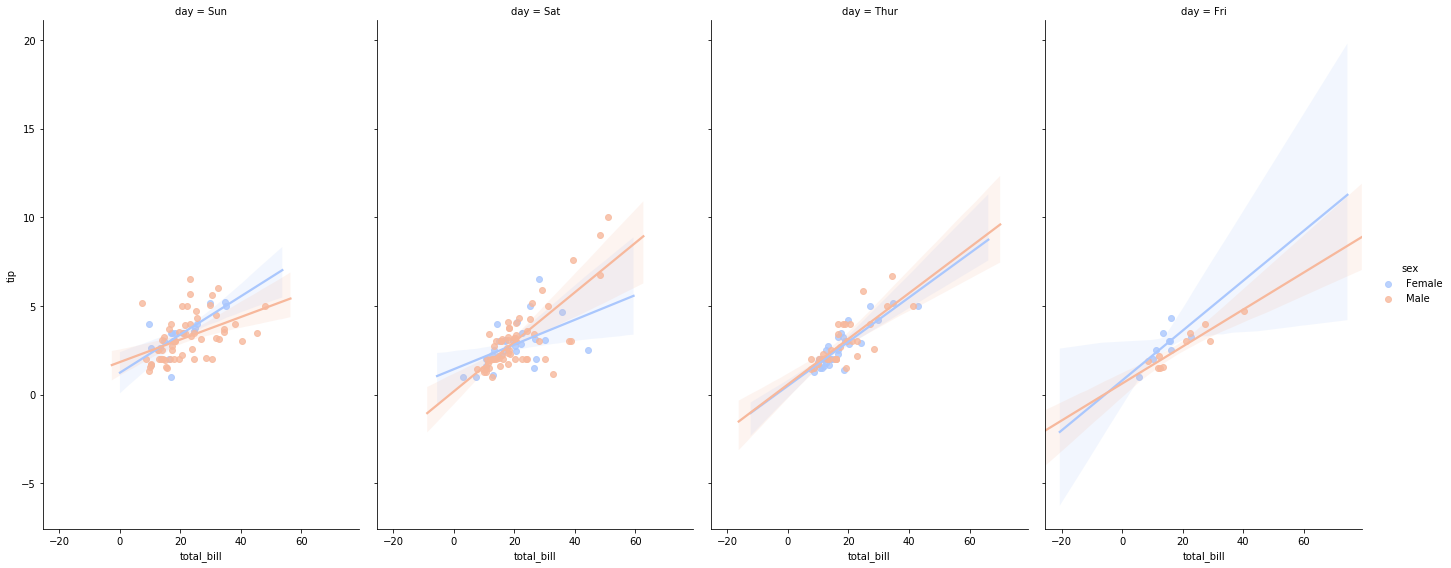

In [21]:
sb.lmplot(x='total_bill',y='tip', data=dataset, col='day',hue='sex',palette='coolwarm', aspect=0.6, size=8)

In [22]:
dataset.isna().head(10)

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [23]:
print(dataset.isna().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [3]:
#Verileri dönüştürme ve temizleme
#Modelimizi oluşturmaya başlamadan önce, tüm metin değerlerini sayılara dönüştürmeliyiz. Bu birçok şekilde yapabilir.
#Replace kullanma:
dataset.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)
dataset.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4
5,25.29,4.71,0,0,Sun,Dinner,4
6,8.77,2.00,0,0,Sun,Dinner,2
7,26.88,3.12,0,0,Sun,Dinner,4
8,15.04,1.96,0,0,Sun,Dinner,2
9,14.78,3.23,0,0,Sun,Dinner,2


In [4]:
days=pd.get_dummies(dataset['day'])
days.head(10)

,Fri,Sat,Sun,Thur
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0


In [5]:
times=pd.get_dummies(dataset['time'])
times.head(10)

,Dinner,Lunch
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [6]:
#Do the same with time column and concat all data frames, Also we don’t need the day and size columns anymore so we drop them
days=pd.get_dummies(dataset['day'])
dataset = pd.concat([dataset,days],axis=1)
#times=pd.get_dummies(dataset['time'],drop_first=True)
dataset = pd.concat([dataset,times],axis=1)
dataset.drop(['day'],inplace=True,axis=1)
dataset.drop(['time'],inplace=True,axis=1)
dataset.head(10)

,total_bill,tip,sex,smoker,size,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,1,0,2,0,0,1,0,1,0
1,10.34,1.66,0,0,3,0,0,1,0,1,0
2,21.01,3.50,0,0,3,0,0,1,0,1,0
3,23.68,3.31,0,0,2,0,0,1,0,1,0
4,24.59,3.61,1,0,4,0,0,1,0,1,0
5,25.29,4.71,0,0,4,0,0,1,0,1,0
6,8.77,2.00,0,0,2,0,0,1,0,1,0
7,26.88,3.12,0,0,4,0,0,1,0,1,0
8,15.04,1.96,0,0,2,0,0,1,0,1,0
9,14.78,3.23,0,0,2,0,0,1,0,1,0


In [9]:
#The correlation coefficient, or simply the correlation, is an index that ranges from -1 to 1. When the value is near zero, there is no linear relationship. As the correlation gets closer to plus or minus one, the relationship is stronger. A value of one (or negative one) indicates a perfect linear relationship between two variables.
#Let’s find the correlation between the variables in the dataset.
dataset.corr ()

,total_bill,tip,sex,smoker,size,Fri,Sat,Sun,Thur,Dinner,Lunch
total_bill,1.000000,0.675734,-0.144877,0.085721,0.598315,-0.086168,0.054919,0.122953,-0.138174,0.183118,-0.183118
tip,0.675734,1.000000,-0.088862,0.005929,0.489299,-0.055463,-0.002790,0.125114,-0.095879,0.121629,-0.121629
sex,-0.144877,-0.088862,1.000000,-0.002816,-0.086195,0.071060,-0.053957,-0.168106,0.194445,-0.205231,0.205231
smoker,0.085721,0.005929,-0.002816,1.000000,-0.133178,0.244316,0.155744,-0.181624,-0.128534,0.054921,-0.054921
size,0.598315,0.489299,-0.086195,-0.133178,1.000000,-0.142184,-0.041121,0.193054,-0.072598,0.103411,-0.103411
Fri,-0.086168,-0.055463,0.071060,0.244316,-0.142184,1.000000,-0.216319,-0.195451,-0.169608,-0.058159,0.058159
Sat,0.054919,-0.002790,-0.053957,0.155744,-0.041121,-0.216319,1.000000,-0.500682,-0.434480,0.462709,-0.462709
Sun,0.122953,0.125114,-0.168106,-0.181624,0.193054,-0.195451,-0.500682,1.000000,-0.392566,0.418071,-0.418071
Thur,-0.138174,-0.095879,0.194445,-0.128534,-0.072598,-0.169608,-0.434480,-0.392566,1.000000,-0.917996,0.917996
Dinner,0.183118,0.121629,-0.205231,0.054921,0.103411,-0.058159,0.462709,0.418071,-0.917996,1.000000,-1.000000


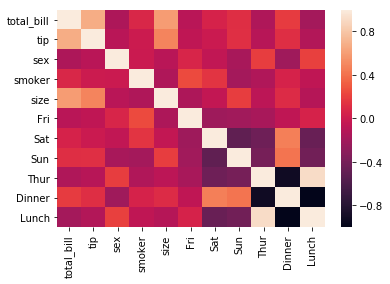

In [10]:
#The correlation coefficient, or simply the correlation, is an index that ranges from -1 to 1. When the value is near zero, there is no linear relationship. As the correlation gets closer to plus or minus one, the relationship is stronger. A value of one (or negative one) indicates a perfect linear relationship between two variables.
#Let’s find the correlation between the variables in the dataset.
corr = dataset.corr()
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [29]:
X = dataset[['sex','smoker','size','Fri','Sat','Sun','Dinner']]
Y = dataset[['tip']]

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.3,random_state=30)#0.3 ile 30 dene, 0.2 ile 5

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
predictions=model.predict(X_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


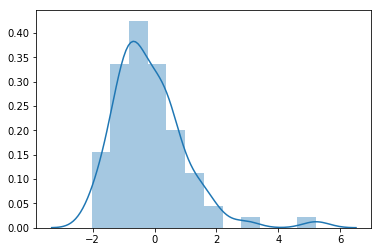

In [48]:
sb.distplot(y_test-predictions)

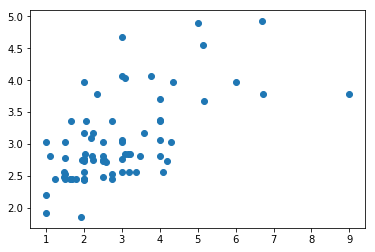

In [49]:
plt.scatter(y_test,predictions)

In [136]:
#To retrieve the intercept:
print(model.intercept_)


[1.30319143]


In [137]:
#For retrieving the slope:
print(model.coef_)

[[-0.02890594  0.26163821  0.61332637 -0.0277802   0.03718982  0.22166166]]
